# Drawing XZ: focal area of an apheric lens

In [1]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'

from pprint import pprint

In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

number of processors: 32


In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=(10,8)

## lens

In [44]:
x0 = sp.linspace(-1.5*mm, 1.5*mm, 1024*16)
z0 = sp.linspace(-0.1 * mm, 5*mm, 1024*2)
wavelength = 2 * um

In [45]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

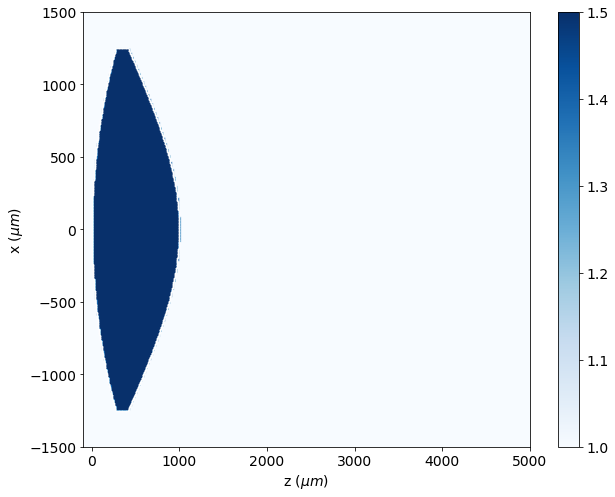

In [46]:
lente2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lente2.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(3*mm),-1/(1*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=1*mm,  size=2.5*mm)

lente2.draw_refraction_index(draw_borders=True, min_incr=0.01,colormap_kind=cm.Blues, colorbar_kind='vertical');

In [47]:
lente2.filter_refraction_index(type_filter=2, pixels_filtering=150);

In [48]:
lente2.incident_field(u0)

In [49]:
lente2.clear_field()
lente2.BPM(verbose=False)

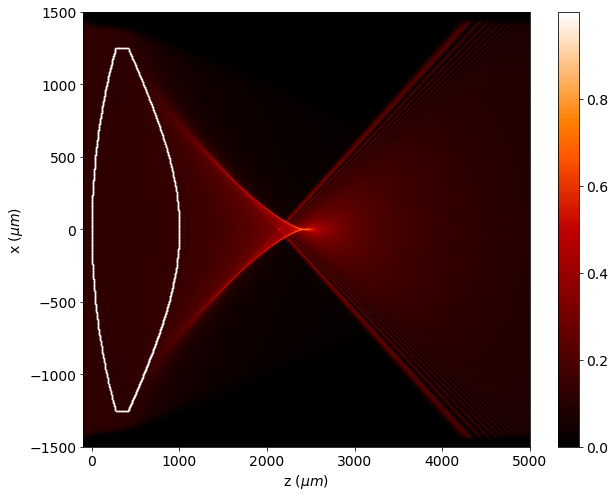

In [50]:
lente2.draw(kind='intensity',logarithm=True, normalize='maximum', draw_borders=True, colorbar_kind='vertical')

In [51]:
x_f,z_f = lente2.search_focus()

x = -0.092 um, z = 2418.857 um


In [62]:
ylim_max=150*um
zlim_max=0.4*mm

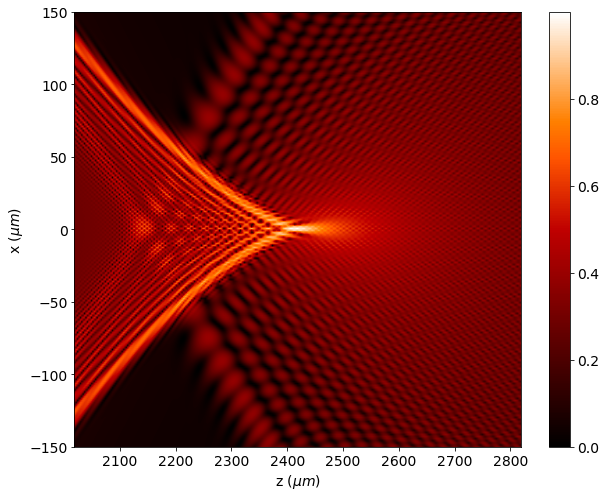

In [63]:
lente2.draw(kind='intensity',logarithm=True, normalize='maximum', draw_borders=True, colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

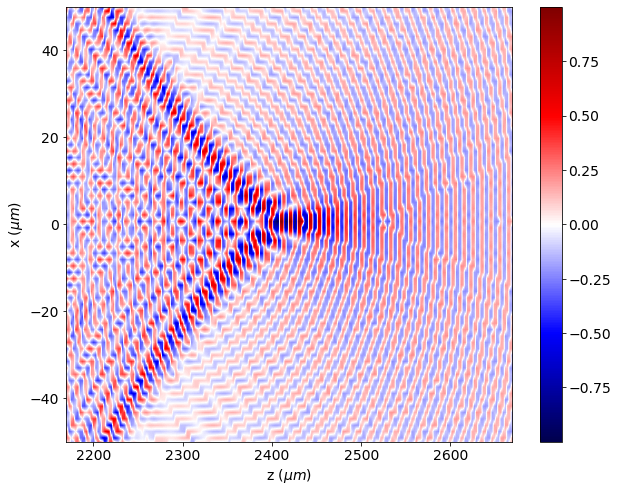

In [54]:
lente2.draw(kind='amplitude',logarithm=False, normalize='maximum', draw_borders=True, colorbar_kind='vertical', 
            colormap_kind=cm.seismic)
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

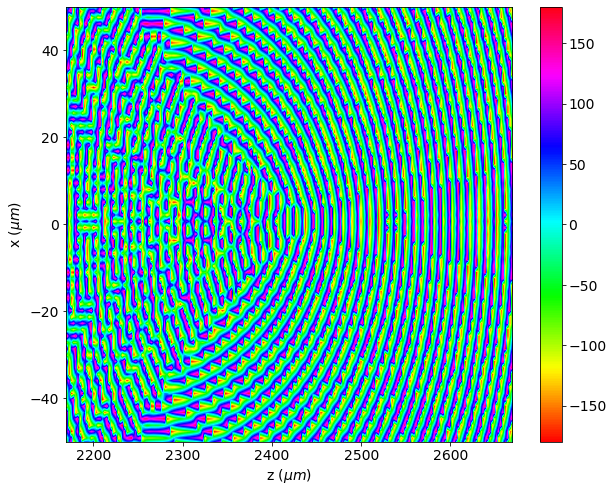

In [55]:
lente2.draw(kind='phase',logarithm=True, normalize='maximum', draw_borders=True, colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

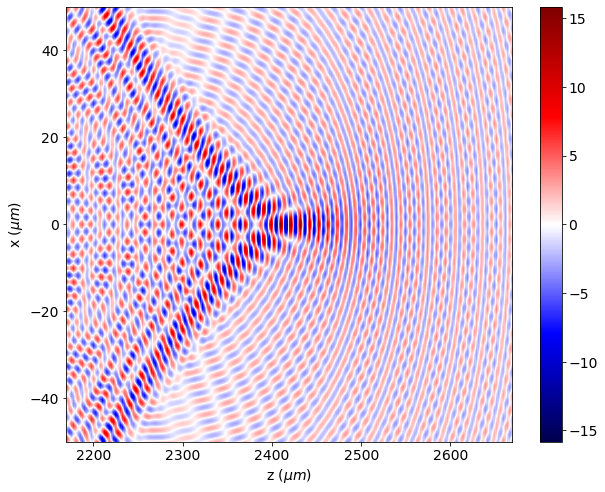

In [56]:
lente2.draw(kind='real',logarithm=False, normalize='maximum', draw_borders=True,colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f-zlim_max,z_f+zlim_max);

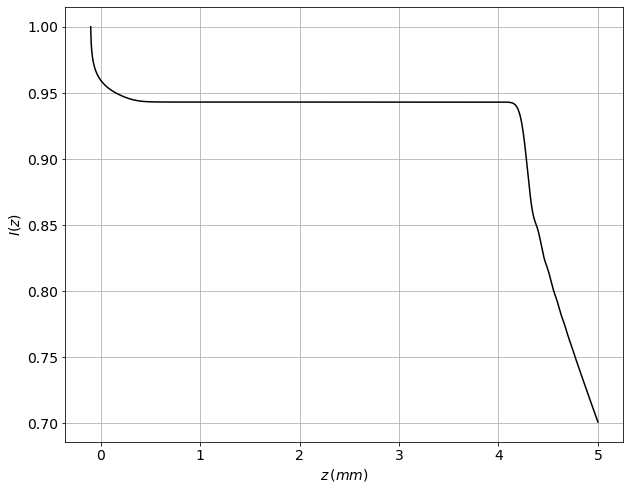

In [57]:
lente2.check_intensity();

(1800.0, 3200.0)

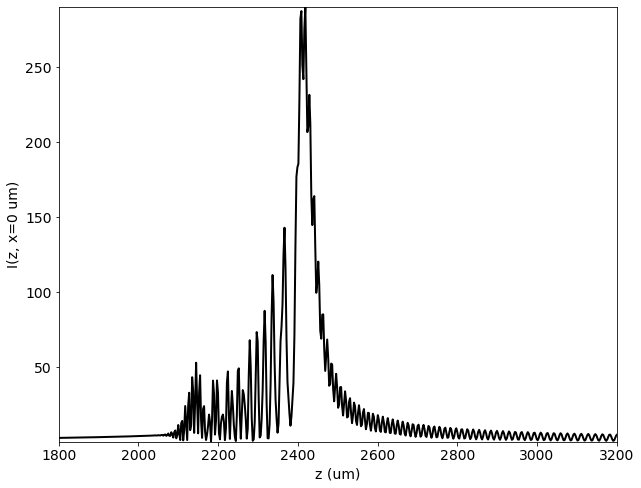

In [58]:
lente2.profile_longitudinal(kind='intensity', logarithm=False, x0=x_f)
plt.xlim(1.8*mm, 3.2*mm)

(-20, 20)

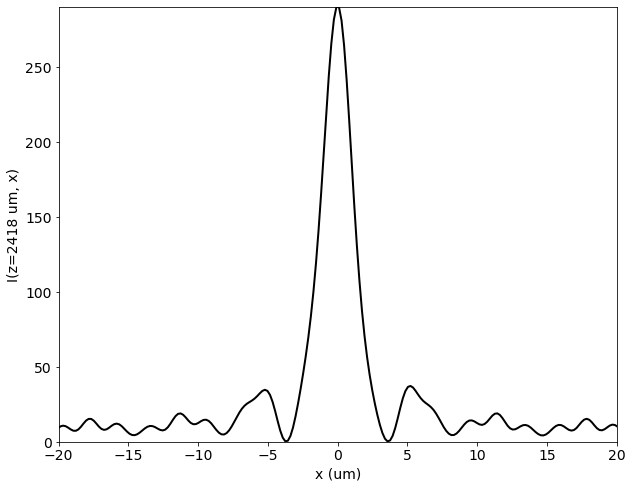

In [59]:
lente2.profile_transversal(kind='intensity', logarithm=False, z0=z_f)
plt.xlim(-20,20)